In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653242806.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Demand'] = [r.random() + r.randrange(50, 100) for _ in range(len_)]

i_data.head(10)

,X,Y,Demand
0,49.384259,18.400913,64.173884
1,-38.877643,-90.708446,97.271895
2,-40.211516,51.153161,57.632290
3,55.381785,-86.851185,89.896918
4,-88.342136,85.796783,78.726624
5,-50.204311,14.933519,76.257711
6,-14.295914,20.464046,68.586700
7,-89.291426,6.698310,85.174485
8,38.534899,21.543380,98.911709
9,80.664222,-56.580321,97.553711


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]
j_data['Fixed Charge'] = [r.random() + r.randrange(5000, 10000) for _ in range(len_)]
j_data['Capacity'] = [r.randrange(500, 1000) for _ in range(len_)]

j_data.head(10)

,X,Y,Fixed Charge,Capacity
0,0.679668,-0.833457,7998.232805,852
1,68.243506,67.705973,7906.879840,835
2,-54.952300,42.162341,7267.976669,650
3,-14.364289,12.164176,6910.284668,842
4,55.295638,-20.035122,6656.058969,603
5,-35.841089,-78.925387,7324.065285,940
6,-56.717951,-82.680649,9771.517631,587
7,54.079889,-79.430271,7998.360512,535
8,12.565457,-99.227983,5852.031138,654
9,0.439505,64.012724,7543.553989,987


Text(0.5, 1.0, 'Customer and Facility Locations')

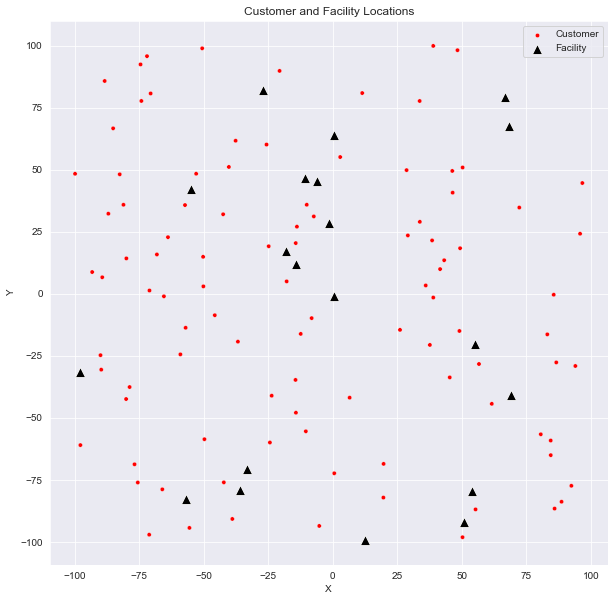

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [8]:
# create distance matrix
eucl = lambda x1, x2, y1, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].to_numpy()
j_loc = j_data[['X', 'Y']].to_numpy()

dist_ij = np.array([np.array([eucl(i[0],i[1],j[0],j[1]) for j in j_loc]) for i in i_loc])
dist_ij

array([[ 31.02027204,  30.98800849, 101.9373402 , ..., 114.09502926, 113.53289436,  48.57255347],
       [ 51.85288514,  51.83359036, 110.08036041, ..., 121.42545088, 120.89740494,  63.91992936],
       [ 91.37720549,  91.36625786, 133.33700811, ..., 142.84681343, 142.39822508,  98.7260318 ],
       ...,
       [ 43.33421151,  43.3111219 , 106.33352217, ..., 118.03928292, 117.49601998,  57.22665079],
       [ 21.27613197,  21.22906462,  99.40642757, ..., 111.83958251, 111.26605329,  43.0082488 ],
       [ 26.00138923,  25.96288957, 100.52380958, ..., 112.83390743, 112.26545802,  45.53139482]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
